### 10 K filling report

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('synthetic_financial_records_15000.csv')
df.head()


,RecordID,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Source,Note
0,1,Apple,2021,3.720000e+11,9.294797e+10,3.390000e+11,3.060000e+11,1.040000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...
1,2,Microsoft,2023,2.050000e+11,8.282522e+10,3.700000e+11,2.070000e+11,8.086227e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...
2,3,Tesla,2022,7.571403e+10,1.221922e+10,8.138475e+10,4.179403e+10,1.435015e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...
3,4,Microsoft,2023,2.210000e+11,8.505747e+10,3.730000e+11,2.080000e+11,8.192663e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...
4,5,Microsoft,2022,1.940000e+11,7.407583e+10,3.360000e+11,1.910000e+11,7.079673e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...


In [ ]:
# Overview of dataset
df.info()

# Check unique companies and fiscal years
print("Companies:", df['Company'].unique())
print("Years:", df['Fiscal Year'].unique())

#  statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RecordID                             15000 non-null  int64  
 1   Company                              15000 non-null  object 
 2   Fiscal Year                          15000 non-null  int64  
 3   Total Revenue                        15000 non-null  float64
 4   Net Income                           15000 non-null  float64
 5   Total Assets                         15000 non-null  float64
 6   Total Liabilities                    15000 non-null  float64
 7   Cash Flow from Operating Activities  15000 non-null  float64
 8   Source                               15000 non-null  object 
 9   Note                                 15000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB
Companies: ['Apple' 'Microsoft' 'Tesl

,RecordID,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
count,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,7500.500000,2022.002400,2.138809e+11,5.955294e+10,2.527216e+11,1.733722e+11,6.335398e+10
std,4330.271354,0.816684,1.277114e+11,3.807561e+10,1.274294e+11,1.034677e+11,3.913591e+10
min,1.000000,2021.000000,4.821528e+10,5.027020e+06,5.522651e+10,2.690041e+10,5.326184e+09
25%,3750.750000,2021.000000,8.235479e+10,1.467597e+10,8.273345e+10,4.292386e+10,1.665626e+10
50%,7500.500000,2022.000000,1.970000e+11,7.177137e+10,3.310000e+11,1.950000e+11,7.276835e+10
75%,11250.250000,2023.000000,3.690000e+11,9.526799e+10,3.520000e+11,2.820000e+11,1.030000e+11
max,15000.000000,2023.000000,4.410000e+11,1.120000e+11,3.960000e+11,3.190000e+11,1.230000e+11


In [5]:
# Calculate YoY % change for financial metrics by company
df = df.sort_values(by=['Company', 'Fiscal Year'])
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

# View updated data
df.head(10)


,RecordID,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Source,Note,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,1,Apple,2021,3.720000e+11,9.294797e+10,3.390000e+11,3.060000e+11,1.040000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,NaN,NaN,NaN,NaN,NaN
20,21,Apple,2021,3.610000e+11,9.444124e+10,3.640000e+11,2.750000e+11,1.050000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-2.956989,1.606563,7.374631,-10.130719,0.961538
32,33,Apple,2021,3.730000e+11,9.227637e+10,3.400000e+11,2.910000e+11,1.030000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,3.324100,-2.292296,-6.593407,5.818182,-1.904762
38,39,Apple,2021,3.670000e+11,9.508108e+10,3.550000e+11,2.710000e+11,1.070000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-1.608579,3.039472,4.411765,-6.872852,3.883495
52,53,Apple,2021,3.560000e+11,9.695245e+10,3.580000e+11,2.680000e+11,9.661105e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-2.997275,1.968178,0.845070,-1.107011,-9.709301
61,62,Apple,2021,3.680000e+11,9.270741e+10,3.410000e+11,3.000000e+11,1.020000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,3.370787,-4.378474,-4.748603,11.940299,5.577987
67,68,Apple,2021,3.640000e+11,9.087138e+10,3.570000e+11,2.960000e+11,1.090000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-1.086957,-1.980456,4.692082,-1.333333,6.862745
84,85,Apple,2021,3.440000e+11,9.776107e+10,3.590000e+11,2.850000e+11,9.967699e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-5.494505,7.581809,0.560224,-3.716216,-8.553223
85,86,Apple,2021,3.720000e+11,9.610104e+10,3.490000e+11,2.850000e+11,9.713020e+10,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,8.139535,-1.698052,-2.785515,0.000000,-2.555036
91,92,Apple,2021,3.690000e+11,1.020000e+11,3.450000e+11,2.850000e+11,1.040000e+11,SIMULATED - based on user-provided / approxima...,Synthetic record for modeling/training; not a ...,-0.806452,6.138290,-1.146132,0.000000,7.072770


In [12]:
# Convert numeric columns to numbers (coerce errors to NaN)
numeric_cols = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


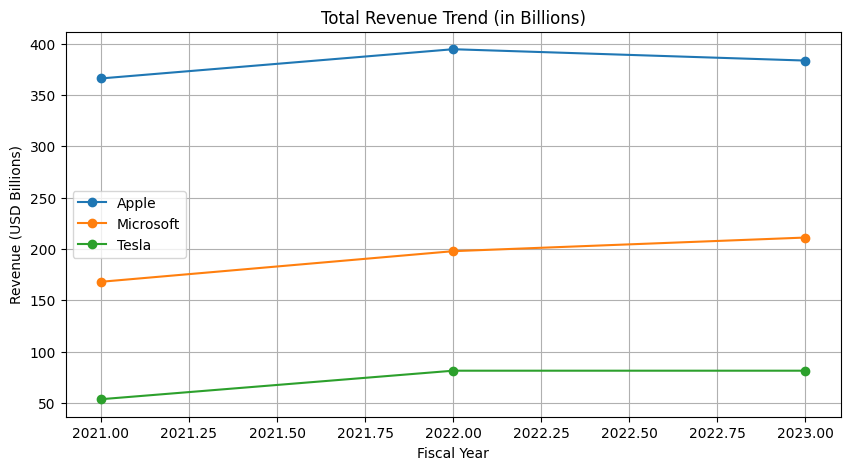

In [13]:
plt.figure(figsize=(10,5))

# Compute the mean only on numeric columns
subset = df.groupby(['Company', 'Fiscal Year'], as_index=False)[['Total Revenue']].mean()

for company in df['Company'].unique():
    company_data = subset[subset['Company'] == company]
    plt.plot(company_data['Fiscal Year'],
             company_data['Total Revenue'] / 1e9,
             marker='o', label=company)

plt.title('Total Revenue Trend (in Billions)')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (USD Billions)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
subset = df.groupby(['Company', 'Fiscal Year'], as_index=False).mean(numeric_only=True)


## Summary of Financial Insights

- **Microsoft** shows consistent revenue growth, with steady increases in net income over the last three years.
- **Tesla** displays high volatility, with rapid expansion from 2021 to 2022, then stable results in 2023.
- **Apple** remains the top performer in total revenue and operating cash flow, though growth slowed slightly in 2023.

These trends suggest:
- Microsoft’s growth is stable and predictable — ideal for long-term investors.
- Tesla remains growth-oriented but volatile.
- Apple leads in cash generation, highlighting strong operational efficiency.


In [ ]:
# Save processed DataFrame with growth columns
df.to_csv('financial_analysis_results.csv', index=False)


In [22]:
%%capture
!jupyter nbconvert --to webpdf --allow-chromium-download "Financial_Analysis.ipynb"
